FireProtector CNN model 

1. Load Data

In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install keras 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install tesorflow-gpu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tesorflow-gpu (from versions: none)
ERROR: No matching distribution found for tesorflow-gpu

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
import os

In [7]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [8]:
import cv2
import imghdr
import matplotlib 

C:\Users\Nusla\AppData\Local\Temp\ipykernel_9376\1208981835.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir='E:/Data'

In [10]:
img_exts=['jpeg','jpg','png','bmp']

In [11]:
img = cv2.imread('E:/Data/fire/01-Five.jpg')

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(410, 728, 3)

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)) :
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [15]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('E:/Data')

Found 1537 files belonging to 2 classes.


In [18]:
batch =data.as_numpy_iterator().next()

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
batch[1]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

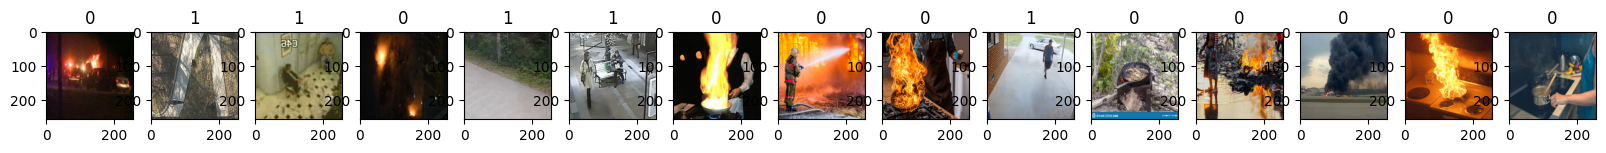

In [21]:
#figuring out the values
fig, ax = plt.subplots(ncols=15 , figsize=(20,20))
for idx,img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    #0- fire image 1- non fire image


2. Pre-process Data

In [22]:
data = data.map(lambda x,y:(x/255,y))
#increases process speed of getting images
#x- independent features
#y- target variable
#scaling

In [23]:
batch1=data.as_numpy_iterator().next()

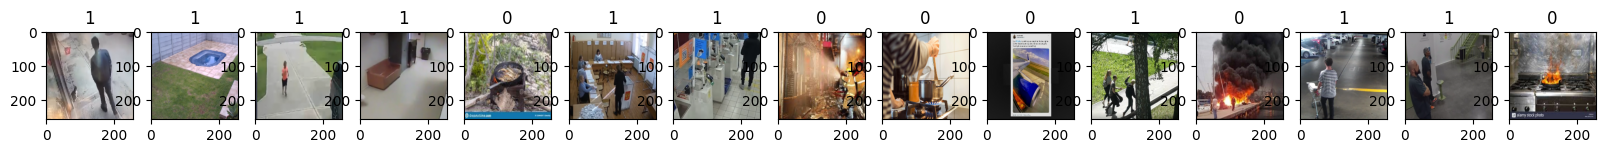

In [24]:
fig, ax = plt.subplots(ncols=15 , figsize=(20,20))
for idx,img in enumerate(batch1[0][:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch1[1][idx])

In [25]:
len(data)

49

In [26]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [27]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test = data.skip(train_size+ val_size).take(test_size)

3. Deep Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

In [29]:
model = Sequential()

In [30]:
#data is sequentially added to the layers
#1st layer/input layer
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

#2nd layer
model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

#3rd layer
model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

#4th layer/ fully connected layer
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

  Training

In [33]:
logdir = 'E:\FireProtector\logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
34/34 [==============================] - 36s 994ms/step - loss: 0.5513 - accuracy: 0.7381 - val_loss: 0.3685 - val_accuracy: 0.8646
Epoch 2/20
34/34 [==============================] - 36s 1s/step - loss: 0.3804 - accuracy: 0.8401 - val_loss: 0.3964 - val_accuracy: 0.8299
Epoch 3/20
34/34 [==============================] - 36s 1s/step - loss: 0.3010 - accuracy: 0.8768 - val_loss: 0.3019 - val_accuracy: 0.9028
Epoch 4/20
34/34 [==============================] - 35s 1s/step - loss: 0.2453 - accuracy: 0.8998 - val_loss: 0.2274 - val_accuracy: 0.9167
Epoch 5/20
34/34 [==============================] - 36s 1s/step - loss: 0.2101 - accuracy: 0.9210 - val_loss: 0.2335 - val_accuracy: 0.9132
Epoch 6/20
34/34 [==============================] - 36s 1s/step - loss: 0.1814 - accuracy: 0.9311 - val_loss: 0.1752 - val_accuracy: 0.9583
Epoch 7/20
34/34 [==============================] - 36s 1s/step - loss: 0.1441 - accuracy: 0.9494 - val_loss: 0.1886 - val_accuracy: 0.9375
Epoch 8/20
34/34 

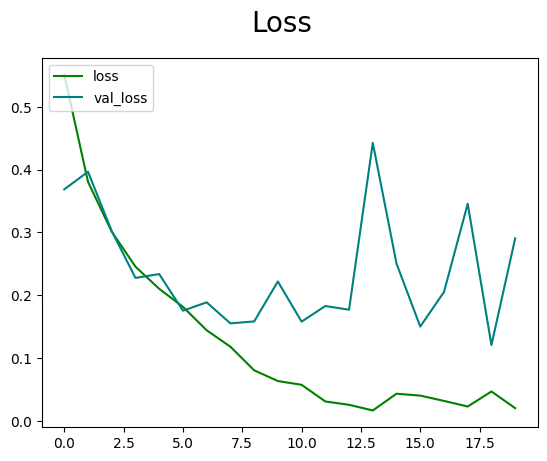

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='green',label='loss')
plt.plot(hist.history['val_loss'],color='teal',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


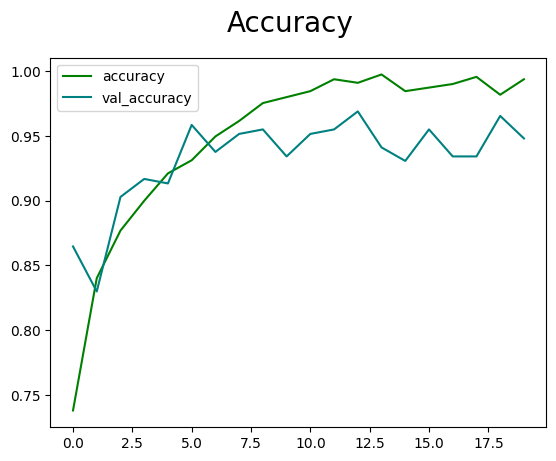

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='green',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='teal',label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

4. Testing and Evaluation

    Evaluation 

In [38]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [39]:
pre=Precision()
re= Recall()
acc= BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)


1/1 [==============================] - 0s 244ms/step


In [41]:
print(f'Precision: {pre.result().numpy()}  Recall: {re.result().numpy()}  Accuracy: {acc.result().numpy()}')

Precision: 0.9508196711540222  Recall: 0.892307698726654  Accuracy: 0.921875


    Testing

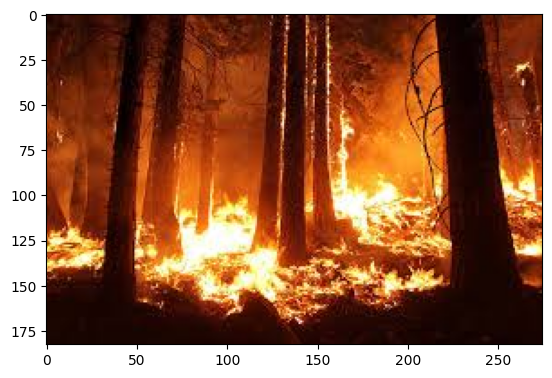

In [61]:
r_img = cv2.imread('wfire.jpeg')
plt.imshow(cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB))
plt.show()

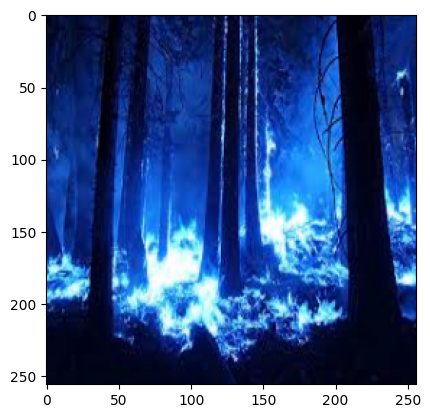

In [62]:
resize = tf.image.resize(r_img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat= model.predict(np.expand_dims(resize/255,0))
yhat


1/1 [==============================] - 0s 25ms/step


array([[0.99285656]], dtype=float32)

In [64]:
if yhat >0.5:
    print('The image has no fire in it')
else:
    print('The image has fire in it ')

The image has no fire in it


Saving the model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','FireProtectorCNN.h5'))
#saving as serialized file

In [48]:
new_model = load_model(os.path.join('models','FireProtectorCNN.h5'))

In [49]:
yhatnew= new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 95ms/step


In [50]:
if yhatnew >0.5:
    print('The image has no fire in it')
else:
    print('The image has fire in it ')

The image has no fire in it
